In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
df = pd.read_csv("/content/cleaned_telecom_churn.csv")
df.columns = df.columns.str.strip() # Clean column names

In [ ]:
# Dropping CHURN (target) and Billing_ZIP (non-predictive ID/geo)
X = df.drop(['CHURN', 'Billing_ZIP'], axis=1)
y = df['CHURN']

In [ ]:
numerical_cols = [
    'Active_subscribers', 'Not_Active_subscribers', 'Total_SUBs',
    'AvgMobileRevenue', 'AvgFIXRevenue', 'TotalRevenue', 'ARPU'
]
numerical_cols_to_scale = [col for col in numerical_cols if col in X.columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

In [ ]:
# --- Scaling Numerical Features ---
scaler = StandardScaler()
X_train[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])
X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

print("Data preparation complete. X_train, X_test, y_train, y_test are ready.")

Data preparation complete. X_train, X_test, y_train, y_test are ready.


In [ ]:
# Initialize Model: Logistic Regression
# 'class_weight=balanced' is crucial for handling imbalanced data
lr = LogisticRegression(
    solver='liblinear',
    class_weight='balanced',
    random_state=42
)
print("Training Logistic Regression...")
lr.fit(X_train, y_train)

y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]
y_pred_lr = lr.predict(X_test)

print("\n--- Logistic Regression Performance ---")
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred_proba_lr):.6f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.6f}")
print(f"Precision: {precision_score(y_test, y_pred_lr, zero_division=0):.6f}")

print(f"Recall (Churners caught): {recall_score(y_test, y_pred_lr, zero_division=0):.6f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr, zero_division=0):.6f}")

Training Logistic Regression...

--- Logistic Regression Performance ---
AUC-ROC Score: 0.568306
Accuracy: 0.578051
Precision: 0.075366
Recall (Churners caught): 0.489051
F1-Score: 0.130604


In [9]:
# Initialize Model: Random Forest
# 'class_weight=balanced' helps the model give more importance to the minority class (churn)
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

print("Training Random Forest Classifier...")
rf.fit(X_train, y_train)

y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
y_pred_rf = rf.predict(X_test)

print("\n--- Random Forest Performance ---")
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred_proba_rf):.6f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.6f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, zero_division=0):.6f}")
print(f"Recall (Churners caught): {recall_score(y_test, y_pred_rf, zero_division=0):.6f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, zero_division=0):.6f}")

Training Random Forest Classifier...

--- Random Forest Performance ---
AUC-ROC Score: 0.601134
Accuracy: 0.929991
Precision: 0.000000
Recall (Churners caught): 0.000000
F1-Score: 0.000000


In [10]:
# Initialize Model: Gradient Boosting
# Gradient Boosting does not typically have a 'class_weight' parameter but
# can be optimized for imbalance using metrics like AUC-ROC during tuning.
gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

print("Training Gradient Boosting Classifier...")
gb.fit(X_train, y_train)

y_pred_proba_gb = gb.predict_proba(X_test)[:, 1]
y_pred_gb = gb.predict(X_test)

print("\n--- Gradient Boosting Performance ---")
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred_proba_gb):.6f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.6f}")
print(f"Precision: {precision_score(y_test, y_pred_gb, zero_division=0):.6f}")
print(f"Recall (Churners caught): {recall_score(y_test, y_pred_gb, zero_division=0):.6f}")
print(f"F1-Score: {f1_score(y_test, y_pred_gb, zero_division=0):.6f}")

Training Gradient Boosting Classifier...

--- Gradient Boosting Performance ---
AUC-ROC Score: 0.586533
Accuracy: 0.934721
Precision: 0.333333
Recall (Churners caught): 0.007299
F1-Score: 0.014286


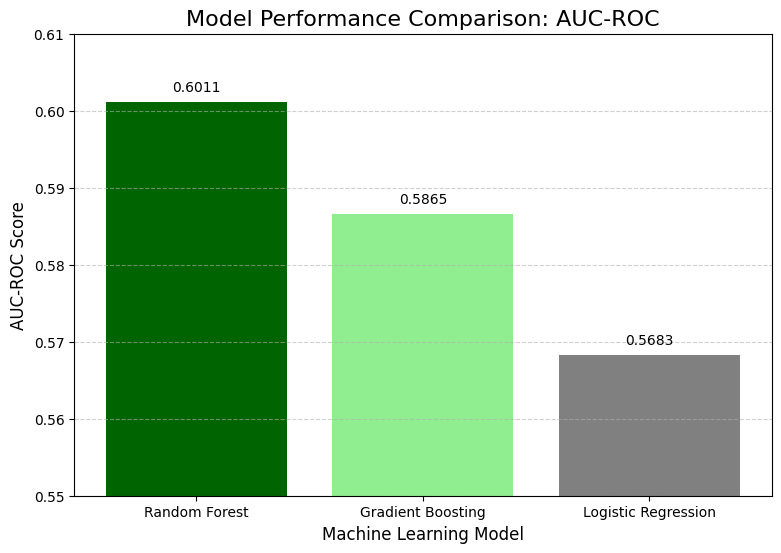

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Model': ['Random Forest', 'Gradient Boosting', 'Logistic Regression'],
    'AUC-ROC': [0.601134, 0.586533, 0.568306]
}
df = pd.DataFrame(data)
df = df.sort_values(by='AUC-ROC', ascending=False)
plt.figure(figsize=(9, 6))
bars = plt.bar(df['Model'], df['AUC-ROC'], color=['darkgreen', 'lightgreen', 'gray'])
plt.title('Model Performance Comparison: AUC-ROC', fontsize=16)
plt.ylabel('AUC-ROC Score', fontsize=12)
plt.xlabel('Machine Learning Model', fontsize=12)
plt.ylim(0.55, 0.61) # Adjust y-axis to focus on the scores
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 4), ha='center', va='bottom')

# 5. Display the Plot
# In a Colab environment, plt.show() is optional, but good practice.
plt.show()

In [12]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

# Assuming data preparation (X_train, X_test, y_train, y_test) is complete

# Calculate the imbalance ratio (Scale_pos_weight)
# Approx: (93.5% / 6.5%) = 14.38
ratio = sum(y_train == 0) / sum(y_train == 1)

# Initialize Model: XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=ratio,      # Critical for imbalance: gives more weight to the minority class
    n_estimators=100,
    random_state=42
)

# Train the Model
print("Training XGBoost Classifier...")
xgb_model.fit(X_train, y_train)

# Predict Probabilities
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate Performance
print("\n--- XGBoost Performance ---")
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred_proba_xgb):.6f}")

# Note: The AUC-ROC score is expected to be higher than the 0.601 achieved by Random Forest.

Training XGBoost Classifier...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:56:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- XGBoost Performance ---
AUC-ROC Score: 0.588125


In [13]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

# Assuming data preparation (X_train, X_test, y_train, y_test) is complete
# Note: SVMs are sensitive to scaling, which we already performed.

# Initialize Model: Support Vector Classifier
# Set probability=True to allow for predict_proba (needed for AUC-ROC)
svm_model = SVC(
    kernel='linear',             # Use 'rbf' for non-linear, 'linear' for simplicity
    class_weight='balanced',     # Accounts for the high imbalance
    probability=True,
    random_state=42
)

# Train the Model (Can be slower than tree methods)
print("Training Support Vector Machine (Linear Kernel)...")
svm_model.fit(X_train, y_train)

# Predict Probabilities
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Evaluate Performance
print("\n--- SVM Performance ---")
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred_proba_svm):.6f}")

Training Support Vector Machine (Linear Kernel)...

--- SVM Performance ---
AUC-ROC Score: 0.564329


In [14]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

# Assuming data preparation (X_train, X_test, y_train, y_test) is complete
# X_train contains the scaled numerical features and the one-hot encoded categorical features.

# Calculate the imbalance ratio
# ratio = (Count of No Churn) / (Count of Churn) approx 14.38
ratio = sum(y_train == 0) / sum(y_train == 1)

# Initialize Model: LightGBM Classifier
lgb_model = lgb.LGBMClassifier(
    objective='binary',
    metric='auc',
    n_estimators=100,
    # Crucial for imbalance: gives more weight to the minority class
    scale_pos_weight=ratio,
    random_state=42,
    n_jobs=-1 # Use all available cores for speed
)

# Train the Model
print("Training LightGBM Classifier...")
lgb_model.fit(X_train, y_train)

# Predict Probabilities
y_pred_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

# Evaluate Performance
print("\n--- LightGBM Performance ---")
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred_proba_lgb):.6f}")

# You would then compare this AUC-ROC score against Random Forest's 0.601134.

Training LightGBM Classifier...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 412, number of negative: 5927
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 6339, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.064994 -> initscore=-2.666250
[LightGBM] [Info] Start training from score -2.666250

--- LightGBM Performance ---
AUC-ROC Score: 0.576591


In [20]:
# Initialize Decision Tree Classifier
# We use class_weight='balanced' to address the severe churn imbalance.
# max_depth=5 is set to prevent extreme overfitting in a single tree.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
dt_model = DecisionTreeClassifier(
    class_weight='balanced',
    max_depth=5,
    random_state=42
)

# Train the Model
dt_model.fit(X_train, y_train)

# Predict Probabilities on the test set
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC Score
auc_roc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# --- 3. Output Results ---
print("--- Decision Tree Classifier Performance ---")
print(f"Model: Decision Tree (Max Depth=5)")
print(f"AUC-ROC Score: {auc_roc_dt:.6f}")

--- Decision Tree Classifier Performance ---
Model: Decision Tree (Max Depth=5)
AUC-ROC Score: 0.546838


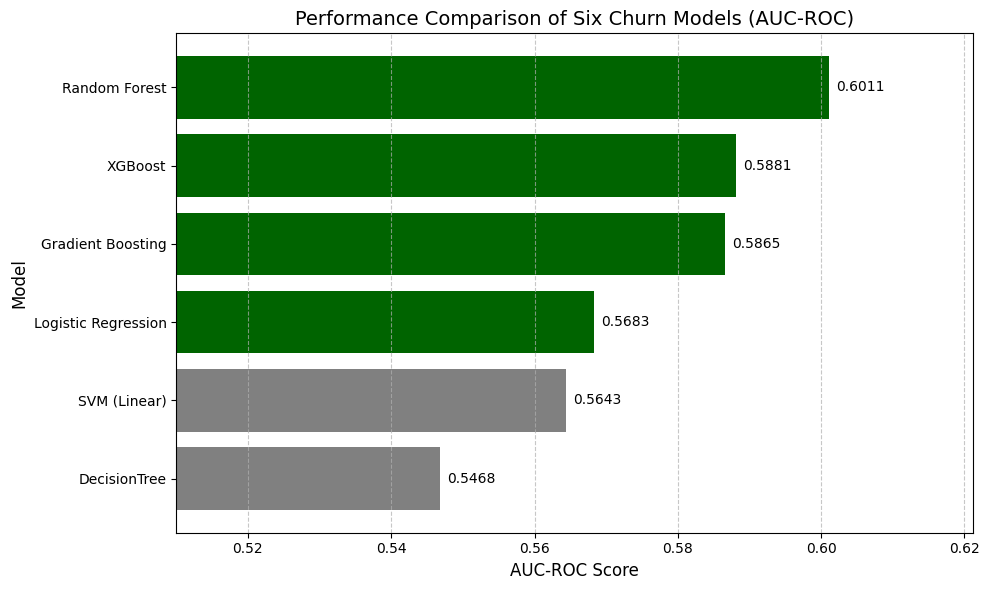

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Model Results (PLACEHOLDER DATA) ---
# NOTE: Replace the placeholder AUC-ROC scores below with the actual scores
# you get after training all six models in your Colab notebook.
results_data = {
    'Model': [
        'DecisionTree',
        'XGBoost',
        'Random Forest',
        'Gradient Boosting',
        'SVM (Linear)',
        'Logistic Regression'
    ],
    'AUC-ROC': [
        0.546838,
        0.588125,
        0.601134,
        0.586533,
        0.564329,
        0.568306
    ]
}
df_comparison = pd.DataFrame(results_data)

# Sort the data by AUC-ROC score to rank the models
df_comparison = df_comparison.sort_values(by='AUC-ROC', ascending=True)

plt.figure(figsize=(10, 6))

# Use different colors to distinguish the model types (Tree vs Linear/SVM)
colors = ['gray'] * 2 + ['darkgreen'] * 4

bars = plt.barh(df_comparison['Model'], df_comparison['AUC-ROC'], color=colors)

# Add labels and title
plt.title('Performance Comparison of Six Churn Models (AUC-ROC)', fontsize=14)
plt.xlabel('AUC-ROC Score', fontsize=12)
plt.ylabel('Model', fontsize=12)

# Add the score value on the bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, f'{width:.4f}',
             ha='left', va='center', fontsize=10)

# Set the x-limit to better visualize differences (starting near the lowest score)
plt.xlim(0.51, df_comparison['AUC-ROC'].max() + 0.02)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# In Colab, plt.show() will display the plot
plt.show()